<a href="https://colab.research.google.com/github/jnalgae/2024S-Ajou-ML/blob/main/HW02_202220735_%EC%A0%95%EC%84%9C%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1. Linear SVM vs Kernel SVM

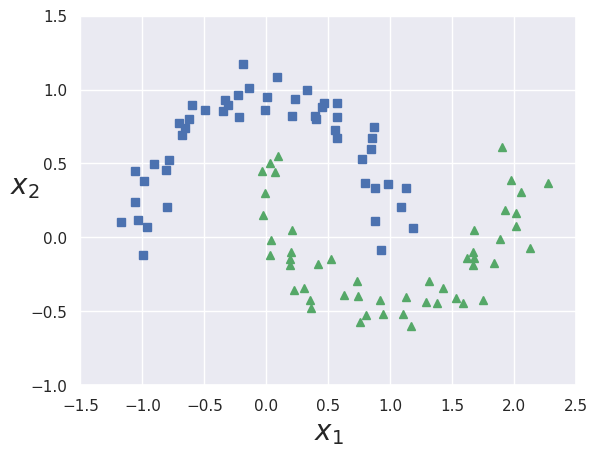

In [32]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

#Toy example 생성
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [33]:
# decision boundary 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #좌표 100개 만들고
    x1s = np.linspace(axes[2], axes[3], 100)  # 좌표 100개 만들고
    x0, x1 = np.meshgrid(x0s, x1s) # 이를 조합한 좌표를 만들고
    X = np.c_[x0.ravel(), x1.ravel()] # 조합한 좌표를 풀어서 나타냄, 1열에는 x0 값을, 2열에는 x1 값을
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

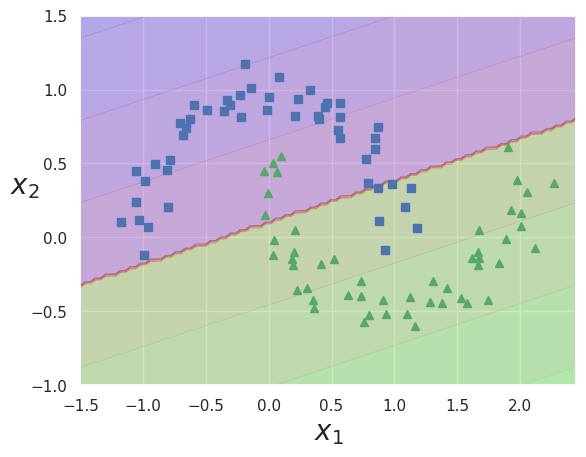

In [34]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=1)
linear_svc.fit(X,y)
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

## 문제 1-1 Kernel SVM 학습

Kernel SVM을 아래의 조건에 맞게 학습하고 시각화를 진행하시오.

\

---
*조건*

 1. `rbf` Kernel을 사용하여 주어진 X를 `100% 정확도`로 예측하는 하이퍼파라미터를 찾으시오.
 2. `Linear SVM`과 `Kernel SVM`의 decision boundary를 시각화하시오.
 3. subplot을 활용하여 기존 `Linear SVM`와 비교할 수 있도록 시각화하시오.
 ---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

Text(0.5, 1.0, 'rbf')

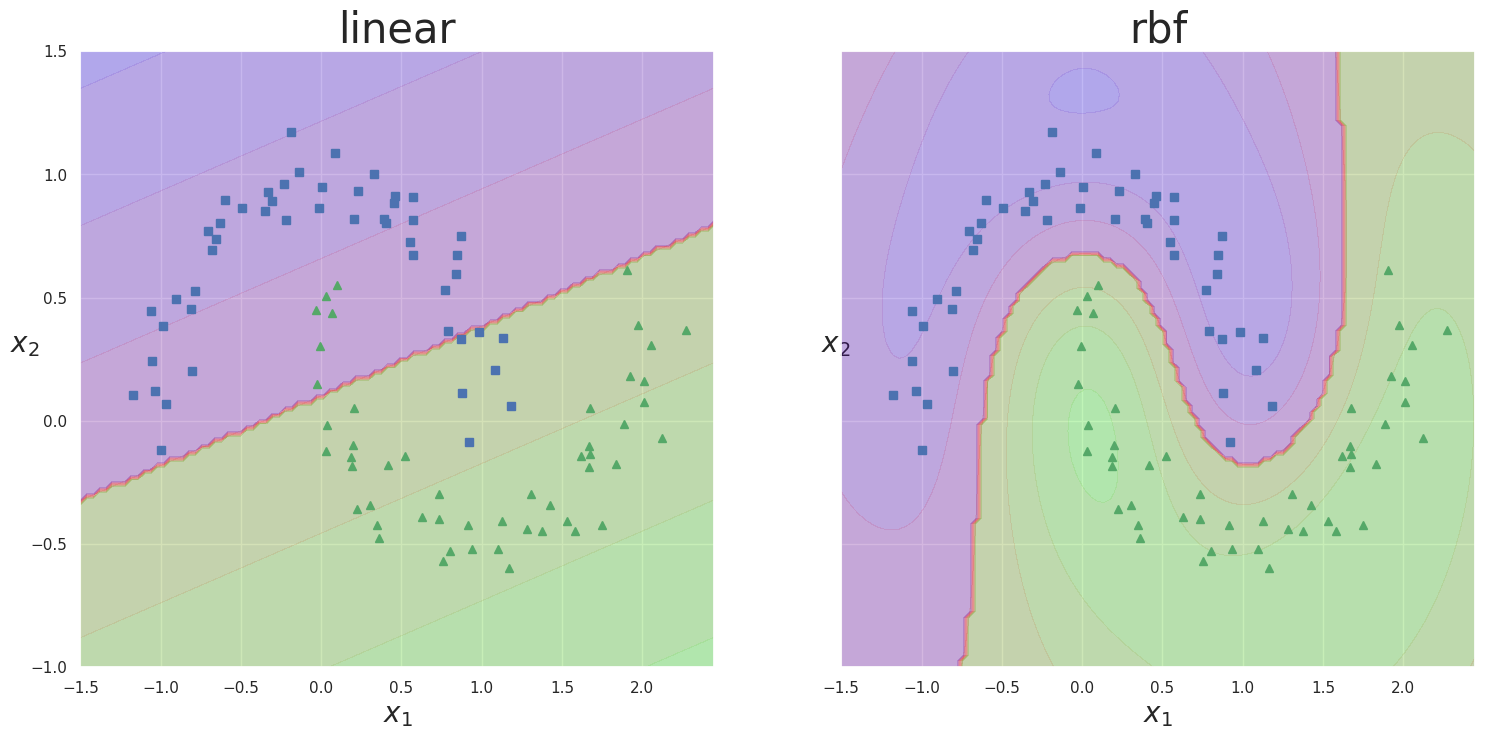

In [35]:
from sklearn.svm import SVC

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True, sharey=True)

plt.sca(axes[0])
plot_predictions(linear_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("linear", fontsize=30)

#####################문제1-1###############################

kernel_svc = SVC(kernel='rbf', C=7.0, gamma=1.2)
kernel_svc.fit(X, y)
plt.sca(axes[1])
plot_predictions(kernel_svc, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title("rbf", fontsize=30)

##########################

# 문제 1-2 Kernel SVM의 장점

* **해당 데이터에서 Linear SVM보다 Kernel SVM이 잘 동작할 수 있는 이유를 서술하시오.**
* **데이터의 분포와 모델의 특징을 연결지어서 설명하시오.**

**정답** :

# 문제 2. Validation

- `Test set` **<font color=red> 은 문제 2-3에서만 사용해야 합니다. </font>**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# dir을 바꿔주세요.
# digits_clean 데이터를 사용해야 합니다.

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('./drive/MyDrive/24-1/digits_clean.csv').to_numpy()
labels = pd.read_csv('./drive/MyDrive/24-1/digits_target.csv').to_numpy().reshape(-1)
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size= 0.2, random_state = 12)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제 2-1

 - 아래 코드의 방식으로 평가 시 발생하는 문제를 서술하시오.
 - `Model fitting` 관점에서 서술
 - Validation set의 목적

In [37]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=100, C=100)
rbf_kernel_svm_clf.fit(train_X, train_y)
X_val, y_val = train_X, train_y
print(f"Validation score : {rbf_kernel_svm_clf.score(X_val, y_val)}")

Validation score : 1.0


#### 정답 :

##문제 2-2 K-fold Cross validation

5-fold Cross Validation (CV) 을 사용하여 모델을 평가하시오.

\

---
*조건*
1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. Cross validation score의 분산과 평균을 출력하시오.
3. Cross validation score(Accuracy)가 0.8 이상인 Hyperparameter를 찾고 전체 train set으로 학습하시오.
4. `Test set`에 대해서 `문제 2-1`에서 학습한 모델과 최종 성능에 대해서 비교하시오 (출력만 하시면 됩니다).

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [38]:
from sklearn.model_selection import KFold

#####################문제2-2###############################
gamma_list = [0.001, 0.01, 0.1]
C_list = [1, 10, 100]
best_gamma = 0
best_C = 0
best_accuracy = 0
best_mean = 0
best_var = 0

for gamma in gamma_list:
  for C in C_list:

    accuracy = []

    kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)
    kfold = KFold(n_splits=5)

    # cross validation 수행
    for train_index, val_index in kfold.split(train_X):

          X_train, X_val = train_X[train_index], train_X[val_index]
          y_train, y_val = train_y[train_index], train_y[val_index]

          kernel_svm_clf.fit(X_train, y_train)

          val_score = kernel_svm_clf.score(X_val, y_val)
          accuracy.append(val_score)

    # 평균 accuracy 비교를 통해 best parameter 업데이트
    if np.mean(accuracy) > best_accuracy:
      best_accuracy = np.mean(accuracy)
      best_gamma = gamma
      best_C = C
      best_mean = np.mean(accuracy)
      best_var = np.var(accuracy)


#평균 출력
print(f"평균 : {best_mean}")

#분산 출력
print(f"분산 : {best_var}")


final_svm = SVC(kernel="rbf", gamma=best_gamma, C=best_C)
final_svm.fit(train_X, train_y)
#########################################################

print(f"final_model 정확도 : {final_svm.score(test_X,test_y)}")
print(f"2-1 model 정확도 : {rbf_kernel_svm_clf.score(test_X,test_y)}")

평균 : 0.9904347826086957
분산 : 0.0001693761814744804
final_model 정확도 : 0.9895833333333334
2-1 model 정확도 : 0.1076388888888889


# 문제 2-3 Stratified K-fold Cross validation

위에서 찾은 하이퍼파라미터로 Stratified K-fold Cross validation을 진행하면서 각 fold의 test y(class)의 분포를 histplot(혹은 barplot) 시각화하세요.

\

---
*조건*

1. **<font color=red>* cross_val_score 함수를 사용하지 마세요. </font>**
2. fold 별 y 분포 그래프의 경우, 주어진 subplot을 활용하세요.
3. (Stratified) Cross validation score의 분산과 평균을 출력하시오.

---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [39]:
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

평균 : 0.988695652173913
분산 : 0.00017844990548204187


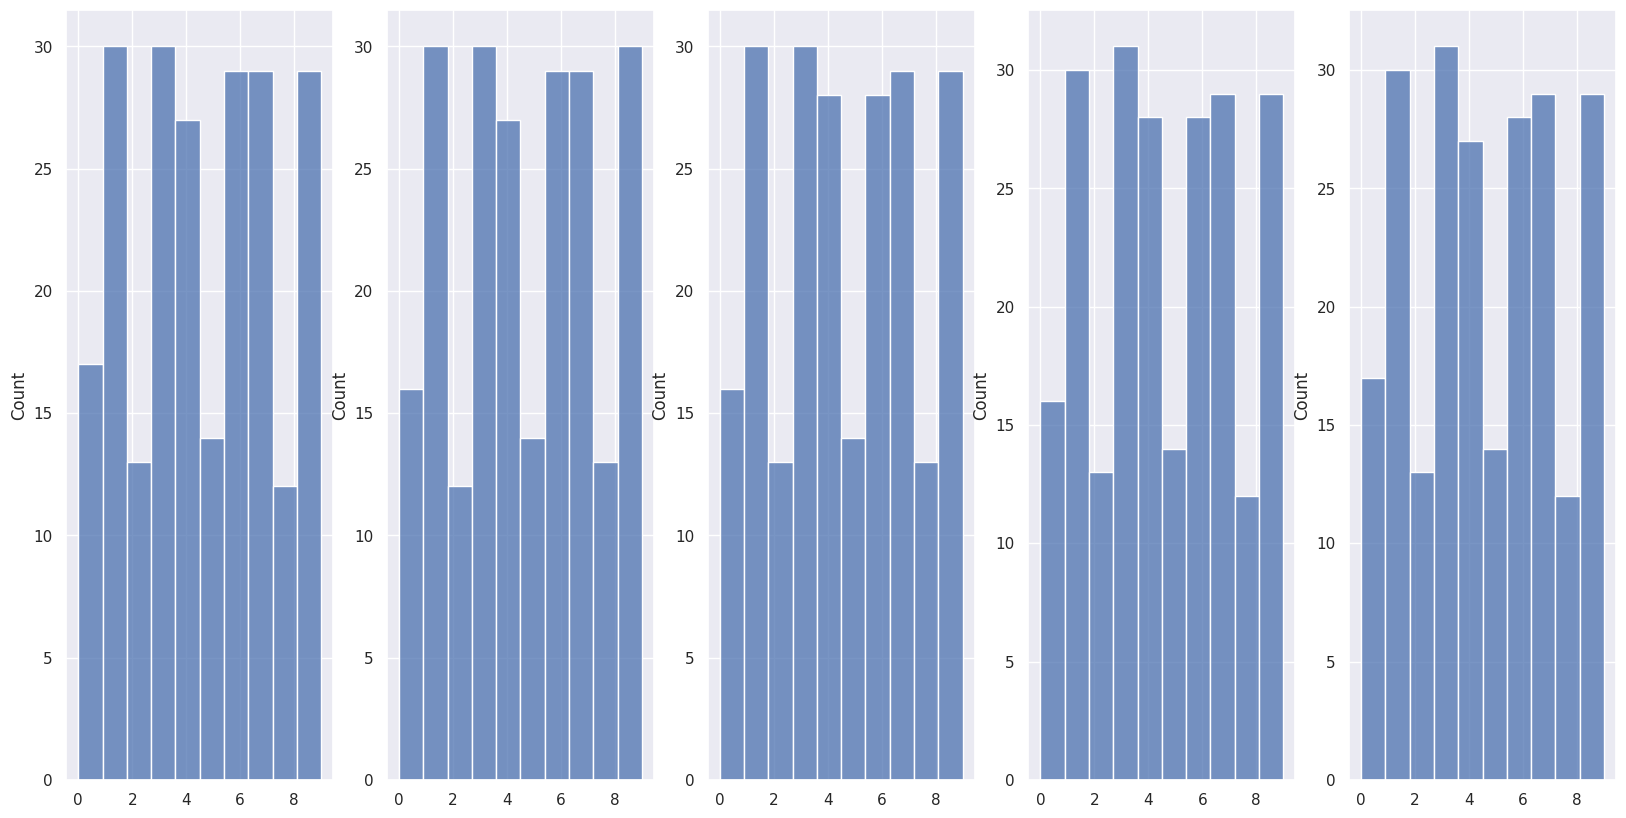

In [40]:
#####################문제2-3###############################
gamma = best_gamma
C = best_C
accuracy = []
n_iter = 0

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)

skfold = StratifiedKFold(n_splits=5)

for train_index, val_index in skfold.split(train_X, train_y):

   X_train, X_val = train_X[train_index], train_X[val_index] # training set
   y_train, y_val = train_y[train_index], train_y[val_index] # validation

   kernel_svm_clf.fit(X_train, y_train)
   val_score = kernel_svm_clf.score(X_val, y_val)
   accuracy.append(val_score)

   sns.histplot(y_val, bins=len(np.unique(y_val)), ax=axes[n_iter])
   n_iter += 1


#평균 출력
print(f"평균 : {np.mean(accuracy)}")

#분산 출력
print(f"분산 : {np.var(accuracy)}")

########################################################

# 문제 3. Grid search

- Scikit-learn 라이브러리를 이용하여 RandomForestClassifier의 최적의 파라미터를 찾는다.

- 아래 baseline 모델보다 높은 성능을 보이는 RandomForestClassifier 모델을 구축한다.

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# dir 바꾸시기 바랍니다.
df = pd.read_csv('/content/drive/MyDrive/24-1/Bank_clean.csv')


# 코드 건드리지 말 것
for i in df.columns: # label encoding
    if type(df[i].unique()[0]) == str :
      le = LabelEncoder()
      df[i] = le.fit_transform(df[i])

y = df['y']
X = df.drop(columns = 'y')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split dataset

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 코드 건드리지 말 것
clf = RandomForestClassifier(n_estimators = 10) # Baseline Model
score=cross_val_score(clf, X_train, y_train, cv=5)
print(f"baseline cross validation score : {score.mean()}")

baseline = clf.fit(X_train,y_train)

baseline cross validation score : 0.8441971383147854



### 문제 3-1
주어진 링크를 참고하여 변경가능한 hyperparameter를 `param_grid`에 추가하세요.

그리고 추가한 hyperparameter에 대해 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고, Accuracy 기반 가장 높은 성능을 보이는 best hyperparameter를 확인하세요.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---
*조건*

- **<font color=red>* Baseline보다 validation score(ACC)가 높아야 합니다. (낮을 시 감점)</font>**
- **충분히 grid search를 진행하세요.**


---



* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요! (해당 문제의 param_gird는 예외입니다.)
* 주의) 소스코드를 입력하고 출력 결과와 함께 캡처 후**(한 이미지에)** 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.


In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [44]:
from re import VERBOSE
##param_grid##를 추가하세요
param_grid = {
    'n_estimators':[80, 100, 120],
    'max_depth':[10, 20, 30, 40],
    'min_samples_leaf':[4, 6, 8, 11, 14],
    'min_samples_split':[3, 5, 7, 9, 11, 14],
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003]
}

In [45]:
clf = RandomForestClassifier(random_state=42) # 과제를 위해 random_state를 고정해두었습니다.


########################## 문제 3-1 ##########################
########################## 코드 작성 ##########################
gs = GridSearchCV(estimator = clf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  verbose = True,
                  cv = 5,
                  n_jobs=-1)

gs.fit(X_train, y_train)

best_parameters = gs.best_params_
best_score = gs.best_score_

######################################### ###################

print(f"Best parameters: {best_parameters}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best parameters: {'max_depth': 30, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 120}
Best score: 0.8593004769475359


### 문제 3-2
3-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 다음 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.



\

---
*조건*

* **<font color=red>test accuracy가 0.87 미만일 경우 감점</font>**
* **충분히 grid search를 진행하세요.**
---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 출력 결과와 함께**(한 이미지에)** 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.



In [46]:
from sklearn.metrics import accuracy_score

## 문제 3-2 ##
## 코드 작성 ##

best_model = gs.best_estimator_
best_model.fit(X_train, y_train)

############

y_pred1 = baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred1)

y_pred2 = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred2)

print(f'Base Model 정확도: {baseline_accuracy:.4f}')
print(f'Best Model 정확도: {best_accuracy:.4f}')

Base Model 정확도: 0.8608
Best Model 정확도: 0.8729


#문제 4. evaluation
### 문제 4-1
문제 3에서 얻은, baseline이 구한 예측값 `y_pred1`과 grid_search로 구한 Best model의 `y_pred2`를 바탕으로, 각 모델의 성능을 평가해봅시다.

confusion matrix를 그리고, F1, Precision, Recall의 평가 지표를 출력하는 코드를 작성하세요.


---


*조건*
1. 주어진 코드를 기반으로 시각화를 진행하세요.
2. Plot 안에 score들이 출력돼야 합니다. (print 함수 X)
3. axes[i].text를 건드리지 마세요.



---




* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

* 힌트) heatmap

In [47]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

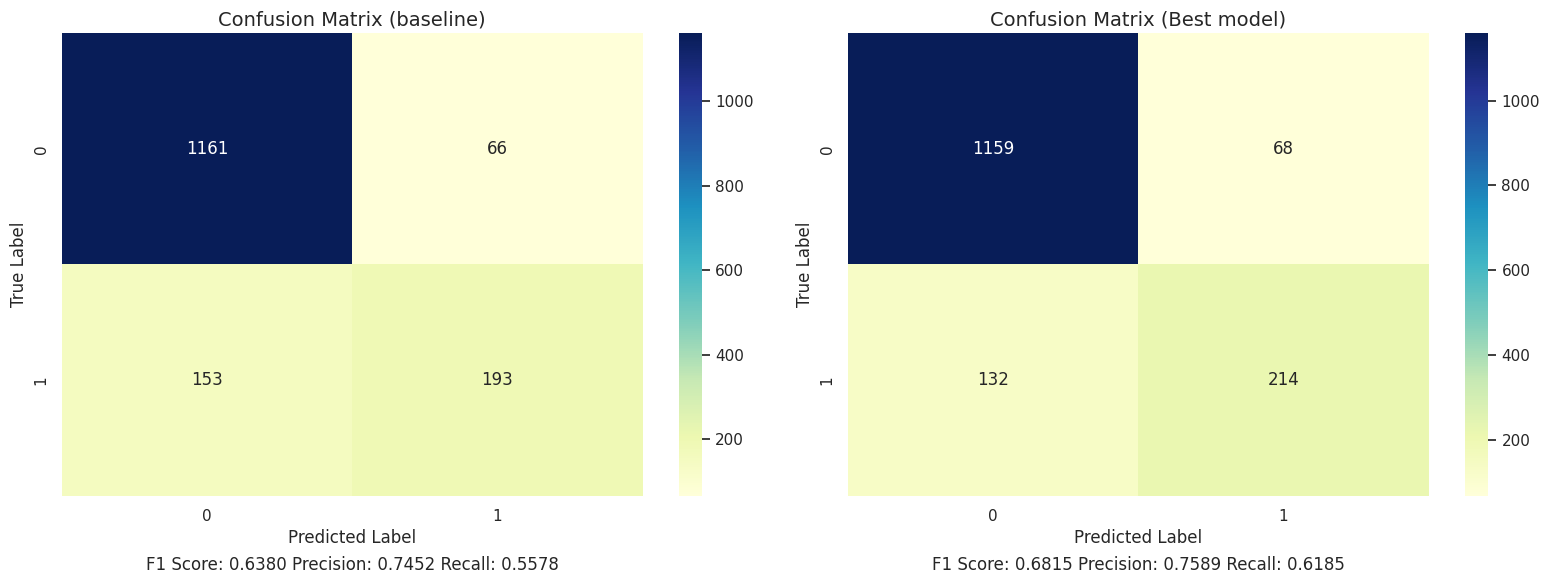

In [48]:
########################## 문제 4-1 ##########################
########################## 코드 작성 ##########################

# baseline model
cm1 = confusion_matrix(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
precision_1 = precision_score(y_test, y_pred1)
recall_1 = recall_score(y_test, y_pred1)

# best model
cm2 = confusion_matrix(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)

# 그래프 그리기
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: baseline model

sns.heatmap(cm1, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Confusion Matrix (baseline)', fontsize=14)
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes,
             fontsize=12)

# 두 번째 subplot : Best model

sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Confusion Matrix (Best model)', fontsize=14)
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].text(0.5,-0.15, f'F1 Score: {f1_2:.4f} Precision: {precision_2:.4f} Recall: {recall_2:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes,
             fontsize=12)

# subplot 간 간격 조절
plt.tight_layout()
plt.show()

####################################


### 문제 4-2
baseline과 bset_model에 대한 ROC Curve와 AUROC를 구하고, 두 모델의 ROC Curve를 시각화하시오.

\

---

*조건*
1. 두 모델의 ROC Curve (line)를 비교할 수 있도록 **하나의 그래프**에 시각화해야 합니다.
2. plot의 legend 안에 각 모델의 AUROC score를 출력하시오. (예시, Best model (area = 0.833))



---

\

* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 힌트) model**.predict_proba**를 사용


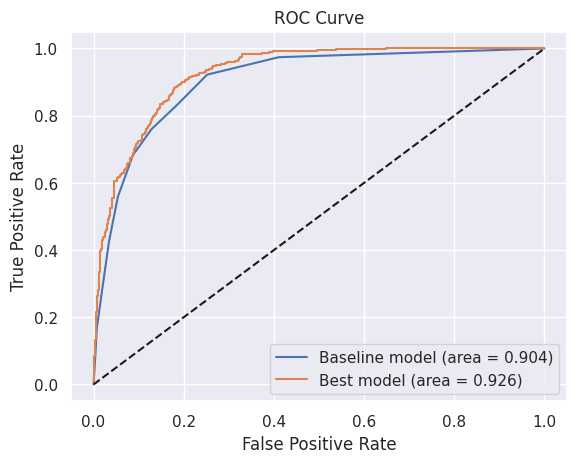

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

########################## 문제 4-2 ##########################
########################## 코드 작성 ##########################

fpr1, tpr1, thresholds1 = roc_curve(y_test, baseline.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

auroc1 = roc_auc_score(y_test, baseline.predict_proba(X_test)[:, 1])
auroc2 = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# ROC Curve 그리기
plt.plot(fpr1, tpr1, label=f'Baseline model (area = {auroc1:.3f})')
plt.plot(fpr2, tpr2, label=f'Best model (area = {auroc2:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUROC
############################################################